# Telemarketing example

A popular strategy in direct marketing is the telemarketing phonecalls; even if this kind of intervention is a low-cost alternative, the sucess of its implementation relies in the proper targeting of potential clients.

The following dataset provide information on the the success of telemarketing calls for selling a particular bank product. The dataset contains different features types. Namely:

Client information:
- age: Age of the potential client
- job: admin., blue- collar, entrepreneur, housemaid...
- marital_status: married, single, unknown
- education:basic.4y,basic.6y,basic.9y,high.school,illiterate,...

Client-Bank Relation
- default: The client has credit in default: no,yes,unknown 
- housing: The client has a housing loan contract: no,yes,unknown
- loan:	The client has a personal loan: no,yes,unknown

Campain
- contact: Communication type (cellular,telephone)
- month: Last month contacted (jan, feb ,..., dec)
- day_of_week: Last contact day : (mon, tue,..., fri)  
- duration: Last contact duration (in seconds)
- campain: Number of contacts performed during this campaign
- pdays: of days that passed by after last contact (999 if the client was not previously contacted)
- previous: Number of contacts performed before this campaign
- poutcome: Outcome of the previous marketing campaign: failure,nonexistent,success

Economic indicators
- emp.var.rate: numerical	Employment variation rate in the last quarter 
- cons.price.idx: numerical	Consumer price index in the last month
- cons.conf.idx: numerical	Monthly consumer confidence index
- euribor3m: numerical	Daily Euro Interbank Offered Rate
- nr.employed: numerical	Number of employeed in the last quarter


## Data import

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('telemarketing.csv')


In [2]:
df.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
0,56,admin.,married,basic.9y,no,yes,no,cellular,aug,wed,...,1,4,1,success,-2.9,92.201,-31.4,0.879,5076.2,1
1,52,admin.,single,university.degree,no,yes,no,cellular,jun,mon,...,1,999,0,nonexistent,-2.9,92.963,-40.8,1.266,5076.2,1
2,45,housemaid,married,basic.4y,no,no,no,cellular,aug,wed,...,5,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,0


In [3]:
df.dtypes

#if wrond dtype
#df['col_dt'] = pd.to_datetime(df['old_col'])
#df['col_num'] = pd.to_numeric(df['old_col'])
#df['col_num'] = pd.to_string(df['old_col'])

#be aware of memory allocation
#df['age'].astype('int32')

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
target              int64
dtype: object

In [4]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
target            0
dtype: int64

## Split categorical/continuos variables

In [5]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
target              int64
dtype: object

In [6]:
df_categorical=df.select_dtypes(include=['object'])
df_categorical.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,admin.,married,basic.9y,no,yes,no,cellular,aug,wed,success
1,admin.,single,university.degree,no,yes,no,cellular,jun,mon,nonexistent
2,housemaid,married,basic.4y,no,no,no,cellular,aug,wed,nonexistent
3,management,single,university.degree,no,no,no,telephone,may,tue,nonexistent
4,technician,single,university.degree,no,yes,yes,cellular,nov,fri,nonexistent


In [7]:
df_numerical=df.select_dtypes(include=[np.number])
df_numerical.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
0,56,73,1,4,1,-2.9,92.201,-31.4,0.879,5076.2,1
1,52,327,1,999,0,-2.9,92.963,-40.8,1.266,5076.2,1
2,45,188,5,999,0,1.4,93.444,-36.1,4.964,5228.1,0
3,32,237,2,999,0,1.1,93.994,-36.4,4.857,5191.0,0
4,32,1162,2,999,0,-0.1,93.200,-42.0,4.021,5195.8,0


In [8]:
#if you forget about np.number
df_numerical=df.select_dtypes(include=['int','float'])
df_numerical.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
0,56,73,1,4,1,-2.9,92.201,-31.4,0.879,5076.2,1
1,52,327,1,999,0,-2.9,92.963,-40.8,1.266,5076.2,1
2,45,188,5,999,0,1.4,93.444,-36.1,4.964,5228.1,0
3,32,237,2,999,0,1.1,93.994,-36.4,4.857,5191.0,0
4,32,1162,2,999,0,-0.1,93.200,-42.0,4.021,5195.8,0


## Categorical data

In [9]:
df_categorical.shape

(15000, 10)

In [10]:
df.marital.value_counts()

married     8934
single      4389
divorced    1651
unknown       26
Name: marital, dtype: int64

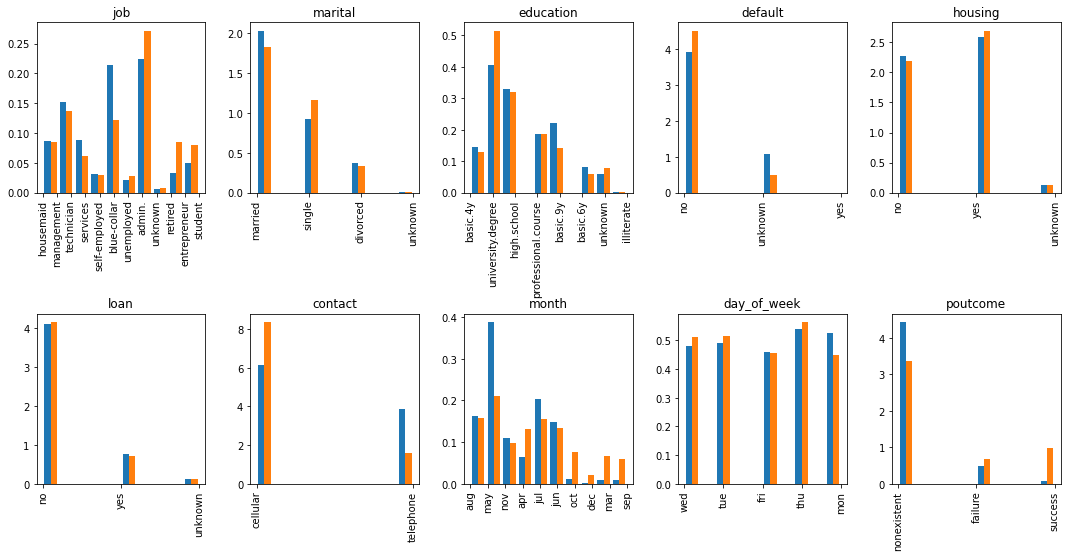

In [11]:
df_0=df_categorical[df['target']==0] # records wih target==0
df_1=df_categorical[df['target']==1] # records wih target==1


fig, axes = plt.subplots(2, 5,figsize=[15,7])
axes = axes.flatten()
fig.tight_layout(h_pad=10)

i=0
for x in df_categorical.columns:
    plt.sca(axes[i]) # set the current Axes
    plt.hist([df_0[x],df_1[x]],density=True)
    plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
    plt.title(x)
    i+=1
plt.show()


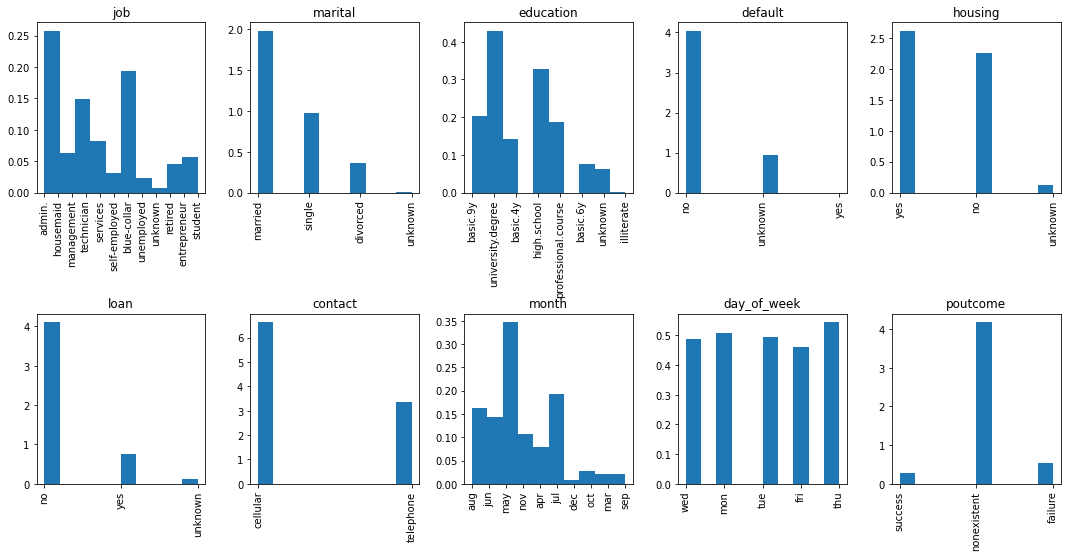

In [12]:
fig, axes = plt.subplots(2, 5,figsize=[15,7])
axes = axes.flatten()
fig.tight_layout(h_pad=10)

i=0
for x in df_categorical.columns:
    plt.sca(axes[i]) # set the current Axes
    plt.hist(df_categorical[x],density=True)
    plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
    plt.title(x)
    i+=1
plt.show()

In [13]:
selection_categorical=['job', 'marital', 'education', 'default','contact', 'month', 'poutcome']

dummies = pd.get_dummies(df_categorical[selection_categorical]) 

dummies.tail()

# sklean.OneHotEncoder

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_nonexistent,poutcome_success
14995,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
14996,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
14997,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
14998,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
14999,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


## Numerical data

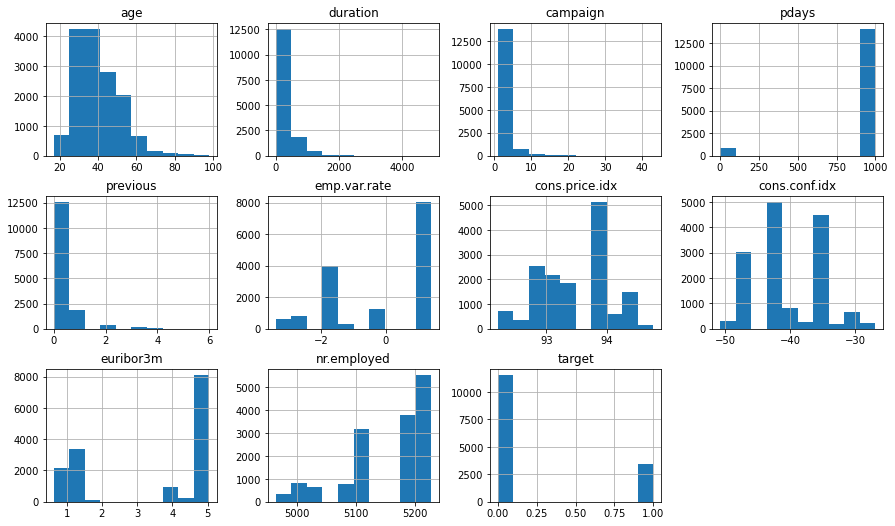

In [14]:
df_hist=df_numerical.hist(layout=(4,4), figsize=(15,12))

In [15]:
import math
pd.options.mode.chained_assignment = None # no warning on creating a new column

df_numerical['logcampaign']=df_numerical['campaign'].apply(lambda x: math.log(x+1))
df_numerical['logduration']=df_numerical['duration'].apply(lambda x: math.log(x+1))
df_numerical['logprevious']=df_numerical['previous'].apply(lambda x: math.log(x+1))

In [16]:
df_numerical.head(3)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target,logcampaign,logduration,logprevious
0,56,73,1,4,1,-2.9,92.201,-31.4,0.879,5076.2,1,0.693147,4.304065,0.693147
1,52,327,1,999,0,-2.9,92.963,-40.8,1.266,5076.2,1,0.693147,5.793014,0.000000
2,45,188,5,999,0,1.4,93.444,-36.1,4.964,5228.1,0,1.791759,5.241747,0.000000


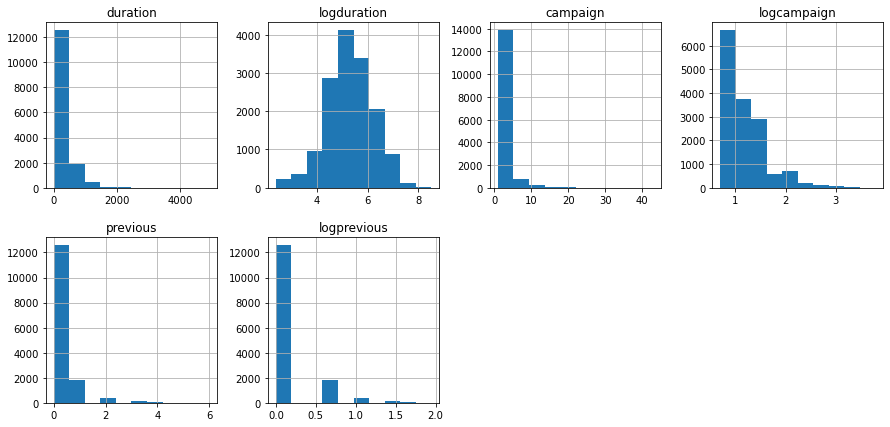

In [17]:
df_hist=df_numerical[['duration','logduration', 'campaign','logcampaign','previous','logprevious']].hist(layout=(2,4), figsize=(15,7))

In [18]:
df_numerical.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'target',
       'logcampaign', 'logduration', 'logprevious'],
      dtype='object')

In [19]:
selection_numerical=['age', 'logduration', 'logcampaign', 'pdays', 'logprevious', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'target']
df_selection_numerical=df_numerical[selection_numerical]

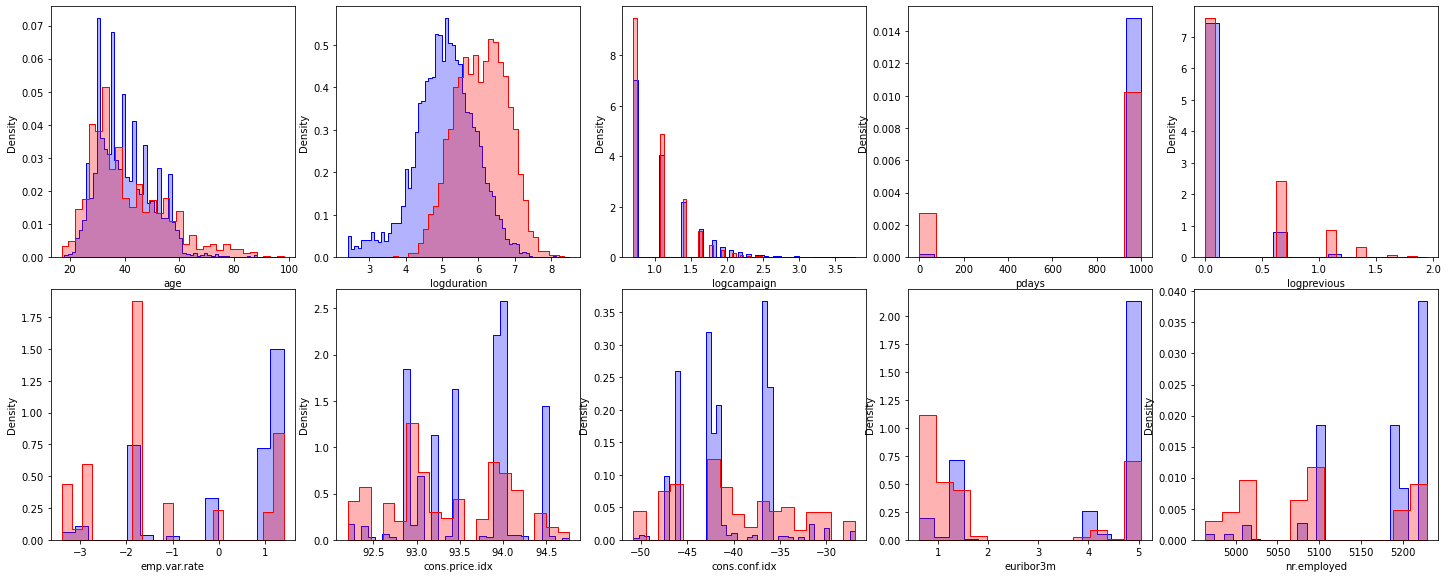

In [20]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt


X0 = df_selection_numerical[df_selection_numerical['target']==0]
X1 = df_selection_numerical[df_selection_numerical['target']==1]

fig, axes = plt.subplots(ncols=5, nrows=2, figsize=(20,8))
fig.tight_layout()

for i, ax in zip(range(df_selection_numerical.columns.size), axes.flat):
    sns.histplot(X0.iloc[:,i], color="blue", ax=ax, stat='density', element="step",  alpha=0.3)
    sns.histplot(X1.iloc[:,i], color="red", ax=ax,stat='density', element="step",  alpha=0.3)
plt.show()

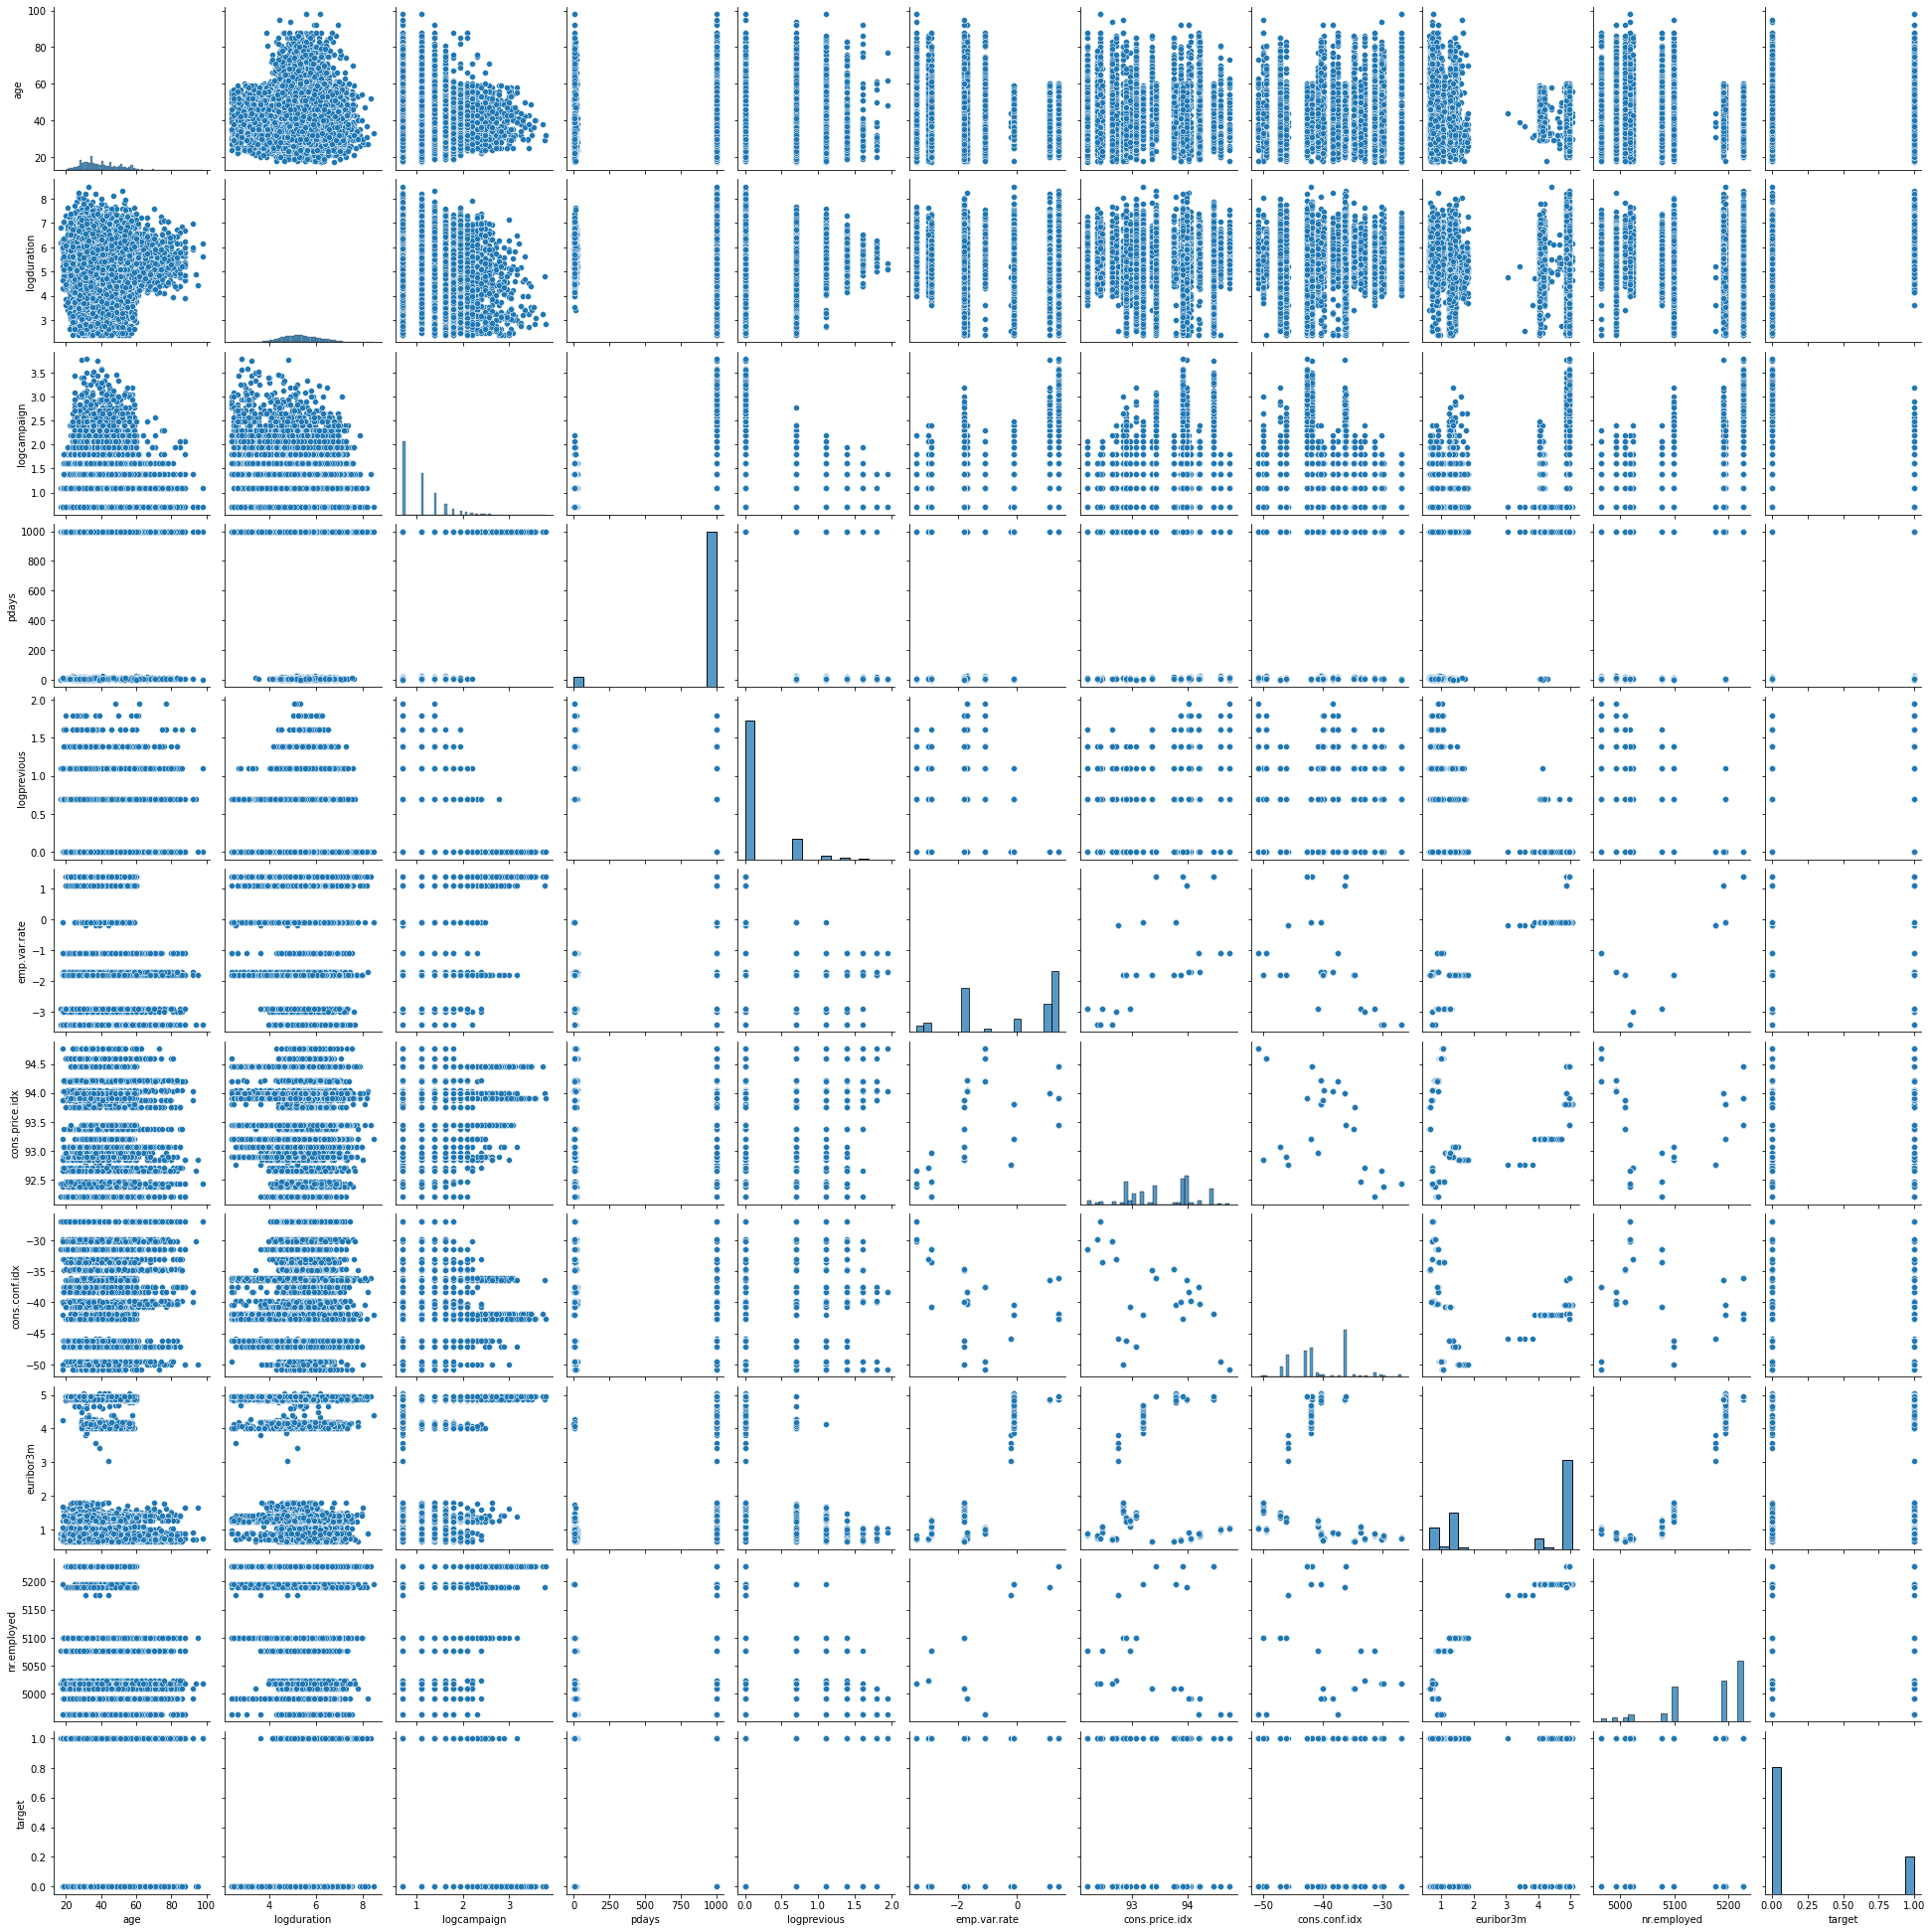

In [21]:
sns.pairplot(df_selection_numerical)

## Standarize

<AxesSubplot:>

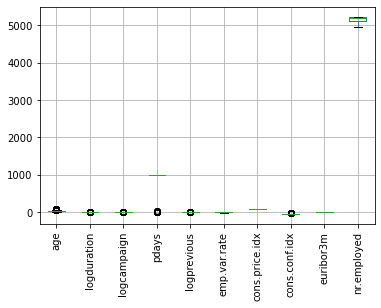

In [22]:
from sklearn.preprocessing import StandardScaler

independent_variables=df_selection_numerical.iloc[:,:-1] #no target
independent_variables.boxplot(rot=90)

In [23]:


scaler = StandardScaler().fit(independent_variables) # No target
scaled_df = pd.DataFrame(scaler.transform(independent_variables))
scaled_df.columns = independent_variables.columns

scaled_df.tail()

# Save the scaler
import pickle
pickle.dump(scaler, open('scaler.pkl', 'wb'))


<AxesSubplot:>

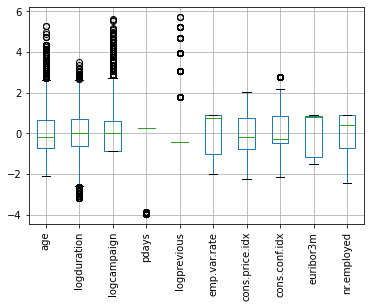

In [24]:
scaled_df.boxplot(rot=90)

In [25]:
scaled_df.tail()

,age,logduration,logcampaign,pdays,logprevious,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
14995,0.991498,0.255617,-0.854550,0.252494,-0.417764,0.728330,0.745760,0.830517,0.794858,0.429467
14996,1.172839,-0.211054,4.054683,0.252494,-0.417764,0.910934,0.618604,-0.467378,0.852827,0.901546
14997,0.084795,-0.224353,1.439148,0.252494,1.773840,-1.036841,-1.096339,-1.188431,-1.195936,-0.739913
14998,-0.549897,-0.971543,0.592612,0.252494,-0.417764,0.910934,-0.174453,0.892321,0.854483,0.901546
14999,0.991498,-0.251445,-0.008014,0.252494,-0.417764,-1.706389,-0.979221,-0.075950,-1.185998,-1.031304


In [26]:
X_numerical=scaled_df

In [27]:
print(dummies.shape)
print(X_numerical.shape)

dummies.tail()

(15000, 42)
(15000, 10)


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_nonexistent,poutcome_success
14995,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
14996,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
14997,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
14998,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
14999,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [28]:
X=pd.concat([dummies,X_numerical], axis = 1)
X.tail()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,age,logduration,logcampaign,pdays,logprevious,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
14995,1,0,0,0,0,0,0,0,0,0,...,0.991498,0.255617,-0.854550,0.252494,-0.417764,0.728330,0.745760,0.830517,0.794858,0.429467
14996,0,0,0,1,0,0,0,0,0,0,...,1.172839,-0.211054,4.054683,0.252494,-0.417764,0.910934,0.618604,-0.467378,0.852827,0.901546
14997,0,0,0,0,1,0,0,0,0,0,...,0.084795,-0.224353,1.439148,0.252494,1.773840,-1.036841,-1.096339,-1.188431,-1.195936,-0.739913
14998,1,0,0,0,0,0,0,0,0,0,...,-0.549897,-0.971543,0.592612,0.252494,-0.417764,0.910934,-0.174453,0.892321,0.854483,0.901546
14999,1,0,0,0,0,0,0,0,0,0,...,0.991498,-0.251445,-0.008014,0.252494,-0.417764,-1.706389,-0.979221,-0.075950,-1.185998,-1.031304


### Separate Train/Test sets


In [29]:
y=df['target']

In [30]:
y.shape

(15000,)

In [31]:
from sklearn.model_selection import train_test_split

#SPLIT DATA INTO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size =0.30, #by default is 75%-25%
                                                    stratify=y, #preserve target propotions 
                                                    random_state= 321) #fix random seed for replicability

print(X_train.shape, X_test.shape)

(10500, 52) (4500, 52)


## Models

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

In [33]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()
parameters = {'n_neighbors':np.arange(10,500,20)}

def hyperp_search(classifier, parameters):
    gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=0, n_jobs=-1)
    gs = gs.fit(X_train, y_train)
    print("f1_train: %f using %s" % (gs.best_score_, gs.best_params_))

    best_model = gs.best_estimator_
    y_pred = best_model.predict(X_test)
    y_pred_train = best_model.predict(X_train)

    print("f1         train %.3f   test %.3f" % (f1_score(y_train, y_pred_train), f1_score(y_test, y_pred) )) 
    print("precision  train %.3f   test %.3f" % (precision_score(y_train, y_pred_train), precision_score(y_test, y_pred) )) 
    print("")
    print(confusion_matrix(y_test, y_pred))
    #print(classification_report(y_test, y_pred))



In [34]:
hyperp_search(classifier,parameters)

f1_train: 0.616378 using {'n_neighbors': 30}
f1         train 0.659   test 0.619
precision  train 0.764   test 0.733

[[3265  201]
 [ 481  553]]


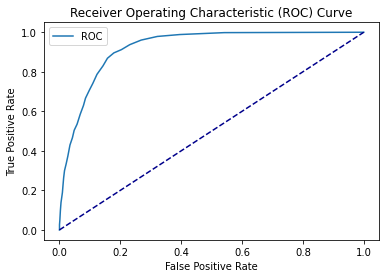

AUC: 0.92


In [35]:
model_knn = KNeighborsClassifier(n_neighbors=30)

def roc(model,X_train,y_train,X_test,y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    y_probs = model.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

    fpr, tpr, thresholds1=metrics.roc_curve(y_test,  y_probs[:,1])

    import matplotlib.pyplot as plt
    plt.plot(fpr, tpr, label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

    auc = metrics.roc_auc_score(y_test, y_probs[:,1])
    print('AUC: %.2f' % auc)
    return (fpr, tpr)

fpr1,tpr1=roc(model_knn,X_train,y_train,X_test,y_test)

In [36]:
#Tree

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
parameters = {'criterion': ['entropy','gini'], 
              'max_depth': [4,5,6,8,10],
              'min_samples_split': [5,10,20],
              'min_samples_leaf': [5,10,20]}

hyperp_search(classifier,parameters)


f1_train: 0.737328 using {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 20}
f1         train 0.752   test 0.737
precision  train 0.748   test 0.725

[[3173  293]
 [ 260  774]]


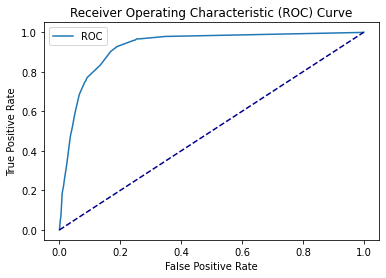

AUC: 0.93


In [37]:
model_tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10, min_samples_split=20)

fpr2,tpr2=roc(model_tree,X_train,y_train,X_test,y_test)


## Plotting the tree 

In [38]:
from sklearn import tree
r = tree.export_text(model_tree,feature_names=X_test.columns.tolist(),max_depth=4)
print(r)


|--- nr.employed <= -0.89
|   |--- logduration <= -0.25
|   |   |--- pdays <= -3.95
|   |   |   |--- logcampaign <= 0.29
|   |   |   |   |--- month_nov <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- month_nov >  0.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- logcampaign >  0.29
|   |   |   |   |--- class: 0
|   |   |--- pdays >  -3.95
|   |   |   |--- logduration <= -1.03
|   |   |   |   |--- age <= -1.05
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- age >  -1.05
|   |   |   |   |   |--- class: 0
|   |   |   |--- logduration >  -1.03
|   |   |   |   |--- cons.price.idx <= 0.02
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- cons.price.idx >  0.02
|   |   |   |   |   |--- class: 0
|   |--- logduration >  -0.25
|   |   |--- pdays <= -3.92
|   |   |   |--- logduration <= 0.20
|   |   |   |   |--- pdays <= -3.96
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- pdays >  -3.96
|   |   |   |   |   |--- class: 1
|   |   |   |--- logduration >  0.2

In [39]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB #or alternative NB implementations

model = GaussianNB()

model.fit(X_train, y_train)
y_pred=model.predict(X_test)

from sklearn.metrics import f1_score
print("f1_score: ", f1_score(y_test, y_pred))

print("f1_test: ", f1_score(y_test, y_pred))


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

f1_score:  0.5190424374319914
f1_test:  0.5190424374319914
[[3139  327]
 [ 557  477]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      3466
           1       0.59      0.46      0.52      1034

    accuracy                           0.80      4500
   macro avg       0.72      0.68      0.70      4500
weighted avg       0.79      0.80      0.79      4500



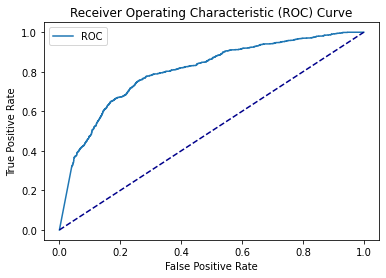

AUC: 0.80


In [40]:
y_probs = model.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

fpr3,tpr3=roc(model,X_train,y_train,X_test,y_test)


In [41]:
# Logistic

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
parameters = {"C":[1e-4,1e-3,1e-2,1e-1,1,10], "max_iter":[1000]}


hyperp_search(classifier,parameters)


f1_train: 0.710848 using {'C': 10, 'max_iter': 1000}
f1         train 0.719   test 0.715
precision  train 0.765   test 0.747

[[3225  241]
 [ 324  710]]


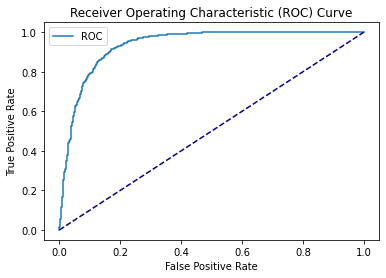

AUC: 0.93


In [42]:
model = LogisticRegression(C=10, max_iter=1000)

fpr4,tpr4=roc(model,X_train,y_train,X_test,y_test)


In [43]:
model.fit(X_train,y_train)

coeff=pd.DataFrame()
coeff["feature"]=X_train.columns
coeff["w"]=model.coef_[0]

coeff.sort_values(by=['w'], inplace=True)

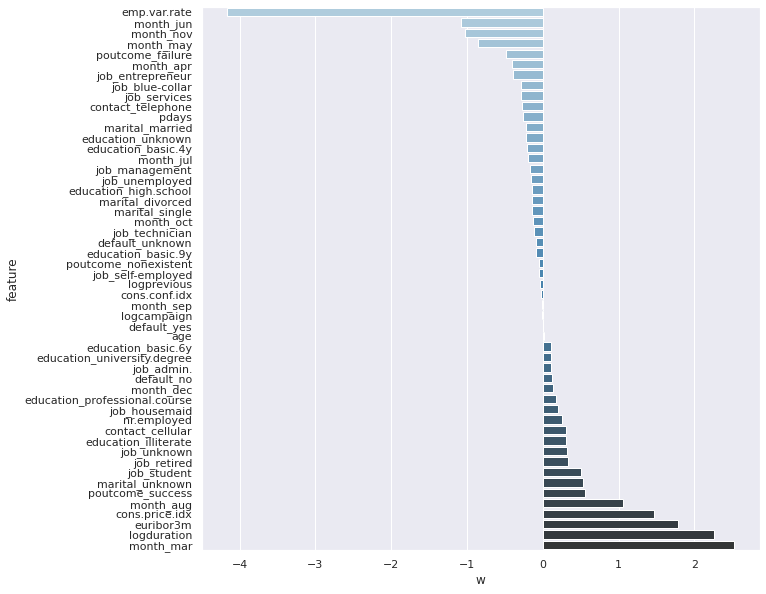

In [44]:
sns.set(rc={'figure.figsize':(10,10)})
sns.barplot(data=coeff, y="feature", x="w", palette="Blues_d", orient="h")
sns.set(rc={'figure.figsize':(6,4)})


In [45]:
#SVM

from sklearn.svm import SVC

classifier = SVC()
parameters = {"kernel":['linear','rbf'], "C":[0.1,100]}

hyperp_search(classifier,parameters)

f1_train: 0.717792 using {'C': 100, 'kernel': 'linear'}
f1         train 0.729   test 0.721
precision  train 0.760   test 0.747

[[3222  244]
 [ 314  720]]


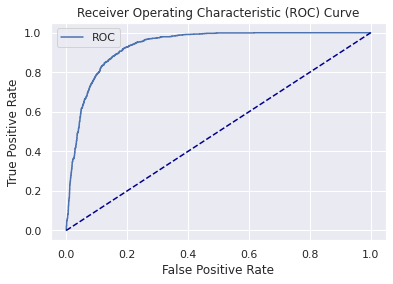

AUC: 0.93


In [46]:
model = SVC(C=100, kernel='linear',probability=True)

fpr5,tpr5=roc(model,X_train,y_train,X_test,y_test)


In [47]:
# Multi-layer Perceptron classifier

from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier()
parameters = {"hidden_layer_sizes":[(10, 5),(100,20,5)],  "max_iter": [2000], "alpha": [0.001,0.1]}

hyperp_search(classifier,parameters)

f1_train: 0.731311 using {'alpha': 0.1, 'hidden_layer_sizes': (10, 5), 'max_iter': 2000}
f1         train 0.776   test 0.741
precision  train 0.775   test 0.727

[[3172  294]
 [ 252  782]]


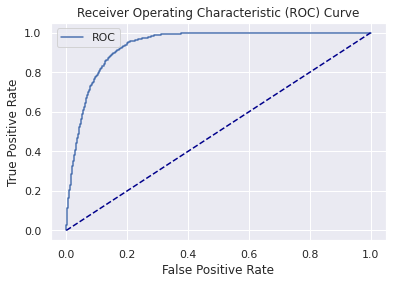

AUC: 0.94


In [49]:
model_MLP=MLPClassifier(hidden_layer_sizes=(10,5), alpha=0.1, max_iter=2000)

fpr6,tpr6=roc(model_MLP,X_train,y_train,X_test,y_test)

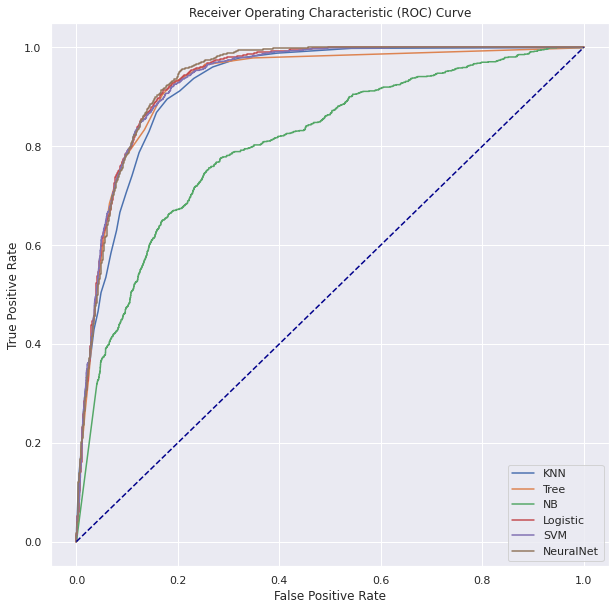

In [50]:
plt.rcParams["figure.figsize"] = (10,10)

plt.plot(fpr1, tpr1, label= "KNN")
plt.plot(fpr2, tpr2, label= "Tree")
plt.plot(fpr3, tpr3, label= "NB")
plt.plot(fpr4, tpr4, label= "Logistic")    
plt.plot(fpr5, tpr5, label= "SVM")
plt.plot(fpr6, tpr6, label= "NeuralNet")
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


## Save the model

In [59]:
import pickle

In [60]:
pickle.dump(model_tree, open('tree_model.pkl', 'wb'))

## Making predictions

In [61]:
import pickle
import pandas as pd
import numpy as np
import math
from sklearn.metrics import f1_score, classification_report, confusion_matrix

In [62]:
# load scaler modand el
loaded_scaler = pickle.load(open('scaler.pkl', 'rb'))
loaded_model = pickle.load(open('tree_model.pkl', 'rb'))

In [63]:
df2 = pd.read_csv('telemarketing_pred_withtarget.csv')

In [64]:
#pd.options.mode.chained_assignment = None  # default='warn'

df2_categorical=df2.select_dtypes(include=['object'])

# Categorical
selection_categorical=['job', 'marital', 'education', 'default','contact', 'month', 'poutcome']
dummies2 = pd.get_dummies(df2_categorical[selection_categorical]) 
    
# Numerical
df2_numerical=df2.select_dtypes(include=[np.number])
df2_numerical.loc[:,'logcampaign']=df2_numerical['campaign'].apply(lambda x: math.log(x+1))
df2_numerical.loc[:,'logduration']=df2_numerical['duration'].apply(lambda x: math.log(x+1))
df2_numerical.loc[:,'logprevious']=df2_numerical['previous'].apply(lambda x: math.log(x+1))

# Scaling - WE MUST USE THE SAME SCALING OF THE TRAIN!
selection_numerical=['age', 'logduration', 'logcampaign', 'pdays', 'logprevious', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'] # no target
df2_selection_numerical=df2_numerical[selection_numerical]
scaled_df2 = pd.DataFrame(loaded_scaler.transform(df2_selection_numerical))
scaled_df2.columns = df2_selection_numerical.columns

# Feature selection

X2=pd.concat([dummies2,scaled_df2], axis = 1)


In [65]:
X2

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,age,logduration,logcampaign,pdays,logprevious,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1,0,0,0,0,0,0,0,0,0,...,-1.184590,0.151479,1.058495,0.252494,1.773840,-1.036841,-1.096339,-1.188431,-1.187102,-0.739913
1,1,0,0,0,0,0,0,0,0,0,...,-0.459227,0.112808,-0.854550,0.252494,-0.417764,-1.036841,-0.791833,-1.373844,-1.110364,-0.739913
2,0,0,0,0,0,0,0,1,0,0,...,-0.096546,0.519282,0.592612,0.252494,-0.417764,0.728330,0.745760,0.830517,0.794858,0.429467
3,0,0,0,0,0,0,1,0,0,0,...,-0.549897,-1.174225,0.592612,0.252494,-0.417764,0.910934,-0.174453,0.892321,0.855035,0.901546
4,0,0,1,0,0,0,0,0,0,0,...,0.991498,0.268499,-0.854550,0.252494,-0.417764,-1.036841,-1.096339,-1.188431,-1.168884,-0.739913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,1,0,0,0,0,0,0,...,-1.003249,-0.767111,-0.008014,0.252494,-0.417764,-0.002086,-0.582693,-0.323168,0.364237,0.490545
4996,0,1,0,0,0,0,0,0,0,0,...,0.719487,-1.174225,1.760986,0.252494,-0.417764,0.910934,1.533797,-0.281965,0.799275,0.901546
4997,0,0,0,0,0,0,0,0,0,1,...,-0.005875,-0.470849,-0.854550,0.252494,-0.417764,-0.002086,-0.582693,-0.323168,0.406747,0.490545
4998,0,0,0,0,0,0,0,1,0,0,...,-1.184590,-1.950731,1.439148,0.252494,-0.417764,-1.036841,-1.096339,-1.188431,-1.199248,-0.739913


In [66]:
X2.default_yes.value_counts()

0    4999
1       1
Name: default_yes, dtype: int64

In [67]:
y_tree_predictions = loaded_model.predict(X2)

In [68]:
y2=df2.target
print("f1: ", f1_score(y2,y_tree_predictions))
print(confusion_matrix(y2,y_tree_predictions))
print(classification_report(y2,y_tree_predictions))

f1:  0.7612193056731583
[[3537  271]
 [ 293  899]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      3808
           1       0.77      0.75      0.76      1192

    accuracy                           0.89      5000
   macro avg       0.85      0.84      0.84      5000
weighted avg       0.89      0.89      0.89      5000

